## Kvantummechanikai szuperpozíció és mérés



### Már említettük, hogy:

- egy qubit "egyszerre lehet" a $|0\rangle$ és $|1\rangle$ kvantumállapotokban:

&emsp;&emsp;&emsp;&emsp;&emsp; $|\psi\rangle=a|0\rangle+b|1\rangle$  &emsp;&emsp;&emsp; ahol $a$ és $b$ az **amplitúdók** 

- ha meg akarjuk ismerni a $|\psi\rangle$ kvantumállapotot, akkor meg kell mérnünk    

    - de **méréskor** csak vagy '0'-t vagy '1'-et kaphatunk, úgy, hogy
    
    &emsp;&emsp;&emsp;&emsp;&emsp; $P(0)=|a|^2$ &emsp; és &emsp; $P(1)=|b|^2$
    &emsp;&emsp;&emsp;&emsp;&emsp; 
    <br>
    
    - ugyanakkor a kettő közül valamelyiket biztosan kapjuk $\Rightarrow$ $P(0)+P(1)=1$
    
    &emsp;&emsp;&emsp;&emsp;&emsp; $\Rightarrow$ $|a|^2+|b|^2=1$ 
    <br>

- az időfejlődés során (ha hattatunk rá kvantumos kapukat) a qubit állapotát jellemző amplitúdók megváltoznak, de az állapot normált marad

- a mérés következtében viszont "összeomlik" a hullámfüggvény, beugrik a $|0\rangle$, vagy az $|1\rangle$ kvantumállapotba

    - Minden további mérés ezután 100%-os valószínűséggel ugyanazt az eredményt adja
    
    - Megj.: A kvantumszámítógépekben lévő mérés mindig csak 0-t vagy 1-et ad eredményül (azt mondjuk, hogy az ún. számítási bázisban mérnek), de elvben használhatnánk más bázist is, pl. a {$|+\rangle$,$|-\rangle$} bázist


### Hogy jobban megértsük az amplitúdók és a valószínűségek közti különbséget

Tekintsük azt a legegyszerűbb példát, amikor egy Hadamard-kaput hajtunk végre valamelyik bázisállapotból indulva

$$H:\, |0\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$$    
$$H:\, |1\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$$ </br>    

- Ha mérést hajtunk végre a qubiten, akkor mindkét esetben $P(0)=\frac{1}{2}$ és $P(1)=\frac{1}{2}$, vagyis a Hadamard-kapu ebből a szempontból hasonlít a klasszikus érmedobásra


- **Mégis más, ugyanis:**

    - Tekintsünk egy klasszikus érmét, amelyiket pl. "írással" felfelé tartunk, majd kétszer egymás után feldobunk és csak ezután nézzük meg, hogy mit kaptunk
        - két feldobás után is $P(\text{fej})=\frac{1}{2}$ és $P(\text{írás})=\frac{1}{2}$
        - az érme állapota nem függ az azt megelőző állapotaitól
    - Ha ugyanígy kétszer alkalmazzuk a H-kaput pl. a $|0\rangle$ állapotból indulva:
        $$|0\rangle \, \rightarrow \, \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \, \rightarrow \, \frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)+\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)\right]=|0\rangle$$
        - az $|1\rangle$ amplitúdói destruktívan interferáltak, a $|0\rangle$-é konstruktívan
        - ezután megmérve a qubit állapotát biztosan 0-t kapunk, tehát $P(0)=1$.
        - Megj.: Ha a két H-kapu közé beiktatnánk még egy mérést, akkor a végén itt is $\frac{1}{2}$-$\frac{1}{2}$ valószínűséggel kapnánk 0-t és 1-et

### Ellenőrizzük le az említett jelenséget!
Hozzunk létre egy egy-qubites áramkört és hattassunk először egy, majd két H-kaput egymás után, végül mérjünk.

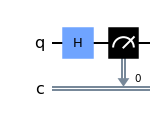

In [24]:
from qiskit import QuantumCircuit, execute, Aer

qc = QuantumCircuit(1,1)
qc.h(0)
#circuit.h(0)

qc.measure(0,0)

qc.draw(output = 'mpl')

Futtassuk az áramkört és írassuk ki az eredményt.

In [25]:
job = execute(qc , Aer.get_backend('qasm_simulator'), shots=1000)

#a 'job' objektum tartalmazza a mérésünk eredményét, ebből az alábbi módon nyerhetjük ki azt 
counts = job.result().get_counts(qc)

#Írassuk ki a mérési eredményt
print(counts)

{'1': 482, '0': 518}


Nézzük meg, mi történik, ha az áramkör bemenete az $|1\rangle$ kvantumállapot (használjunk még egy X-kaput az áramkör legelején).

In [26]:
from qiskit import QuantumCircuit, execute, Aer

qc = QuantumCircuit(1,1)
qc.x(0)
qc.h(0)
qc.h(0)

qc.measure(0,0)

job = execute(qc , Aer.get_backend('qasm_simulator'), shots=1000)

counts = job.result().get_counts(qc)

print(counts)

{'1': 1000}


### Hozzunk létre egy olyan áramkört, amelyben a H-kapu után csak akkor hatunk még egy H-val, ha az első után 0-t mérünk
A qiskitben erre a célra létezik egy ún. feltételes művelet, amely csak akkor hajtódik végre, ha a klasszikus regiszter értéke megfelelő. Ezt a feladatot csak a klasszikus szimulátorral tudjuk elvégezni, mert ez a művelet egylőre nincs implementálva az ingyenes gépeken.

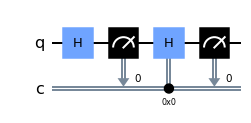

In [27]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# definiáljunk egy egy-qubites kvantumregisztert
q = QuantumRegister(1,"q")
# definiáljunk egy egy-bites klasszikus regisztert
c = ClassicalRegister(1,"c")
# definiáljuk az áramkört
qc = QuantumCircuit(q,c)

# Első Hadamard
qc.h(q[0])

# Az első mérés
qc.measure(q,c)

# A feltételes Hadamard, ami csak akkor hajtódik végre, ha 0-t mérünk
qc.h(q[0]).c_if(c,0)

# A második mérés
qc.measure(q[0],c)

qc.draw(output = 'mpl')

#### Futtassuk le az áramkört 1000-szer. Milyen arányban kapunk 0-t, illetve 1-et?

In [28]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)

counts = job.result().get_counts(qc)   

print(counts)

{'1': 775, '0': 225}


#### Az 1-et kb. háromszor olyan gyakran kapjuk, mint a 0-t. 

Ennek az az oka, hogy az első H-kapu után $\frac{1}{2}$ valószínűséggel kapjuk csak a 0 eredményt, a mérés hatására pedig az állapotunk a $|0\rangle$-ba ugrik. A második H-kapu után ismét $\frac{1}{2}$ a valószínűsége annak, hogy 0-t mérünk, így a 0 eredmény valószínűsége a teljes áramkörben $P(0)=\frac{1}{2}\cdot\frac{1}{2}=\frac{1}{4}$. Mivel abban az esetben, ha az első H-kapu után 1-et mérünk, a második nem hajtódik végre, ezért az 1 mérés legalább $\frac{1}{2}$ valószínűségű, de ehhez hozzá kell még adni azt, amikor végrehajtódik a második H-kapu is, de ott mégis 1-et mérünk, tehát $P(1)=\frac{1}{2}+\frac{1}{4}=\frac{3}{4}$ 

### A mérési valószínűségek becslése

Ahhoz, hogy egy kvantumrendszer állapotát megismerjük, általában nem elegendő egy mérés.

- Láttuk, hogy a kvantumáramköröket eleve több "shot"-tal szokás lefuttatni, mert a különböző mérési eredmények más-más valószínűségűek

    - Ezeket a valószínűségeket a többször újrapreparált qubiteken lefuttatott áramköröket megmérve tudjuk csak megbecsülni

#### Tekintsük ismét a legegyszerűbb egy H-kaput tartalmazó áramkört.

In [29]:
from qiskit import QuantumCircuit, execute, Aer

qc = QuantumCircuit(1,1)
qc.h(0)

qc.measure(0,0)

job = execute(qc , Aer.get_backend('qasm_simulator'), shots=10)

counts = job.result().get_counts(qc)

print(counts)

{'1': 5, '0': 5}


#### Határozzuk meg a két eredmény relatív gyakoriságát!

In [30]:
#számoljuk meg, hogy hányszor mértünk 0-t és 1-et.
n_zeros = counts['0']
n_ones = counts['1']

#Írassuk ki, a '0' és '1' eredmények relatív gyakoriságát.
print("A 0 meresi eredmeny relatív gyakorisága:", n_zeros/(n_zeros+n_ones))
print("Az 1 meresi eredmeny relatív gyakorisága:", n_ones/(n_zeros+n_ones))

A 0 meresi eredmeny relatív gyakorisága: 0.5
Az 1 meresi eredmeny relatív gyakorisága: 0.5


#### Most futtassuk le az áramkört 10, 100, 1000 shot-tal! Mit tapasztalunk?

#### Az eredmények egyre inkább 1/2 - 1/2 arányban oszlanak meg a két lehetőség között

### A statisztikus hibák vizsgálata
- Tekintsük az eddig vizsgált egy-qubites Hadamard-kapus áramkört! 


- Itt az áramkör végén a méréskor két kimenetel lehetséges: '0' vagy '1'  
    - Ezek komplementerek, ezért tekinthetjük az egyiket a sikeresnek (legyen ez a '0'), a másikat a sikertelennek ('1')  
    - Jelöljük a sikeres esemény valószínűségét $p$-vel (ebben az esetben $p=\frac{1}{2}$)  
    - a sikertelen események valószínűsége $q=1-p$   


- Tudjuk, hogy $N$ független, két kimenetelű mérésből:  
    - a sikeres mérések várható értéke: $Np$ 
    <br>
    - a sikeres mérések szórása: $\sqrt{Npq}$  
    
    
- Ha nem a mérések számát, hanem azok valószínűségét tekintjük, akkor a fenti gondolatmenetben szereplő mennyiségeket el kell osztanunk $N$-nel  
    - A sikeres mérések valószínűségének várható értéke: $\dfrac{Np}{N}=p$
    - A sikeres mérések valószínűségének szórása: $\dfrac{\sqrt{Npq}}{N}=\dfrac{\sqrt{pq}}{\sqrt{N}}$
        - Vagyis a szórás annál kisebb, minél nagyobb a mérések $N$ száma $\Rightarrow$ általában célszerű sok mérést végezni

#### Írjunk egy olyan programot:
- amely lefuttatja az egy-qubites Hadamard-kapus áramkört 10-szer egymás után $N=2^4,2^6,2^8,2^{10},2^{12}=16,64,256,1024,4096$ méréssel (shot)
- majd ábrázoljuk a '0' eredmény becsült valószínűségeit az elméletből kapható szórással együtt a $\sqrt{N}$ függvényében!
    - $\sqrt{N}=2^2,2^3,2^4,2^5,2^6=4,8,16,32,64$

In [32]:
from qiskit import QuantumCircuit, execute, Aer
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)

# Importáljuk a math csomagot
from math import sqrt

# Hozzunk létre üres listákat az egyes becsült valószínűségeknek és egyet a mérés-számoknak
p_i_list = []
N_list=[]

# Ez a lépés csak azért van itt, hogy ha többször szeretnénk futtatni ezt a cellát, akkor mindig 
# kiürítsük az előző listákat
p_i_list.clear()
N_list.clear()

# Legyen 10 kísérletünk minden mérés-számhoz
n_kiserlet=10

# Hozzunk létre egy "for" ciklust a különböző mérés-számok beállítására
for j in range(5):
    
    # Állítsuk be a mérések számát 
    n_shots=pow(2,2*(j+2))
    
    # Csináljunk egy újabb "for" ciklust az egyes kísérleteknek
    for i in range(n_kiserlet):

        job = execute(qc , Aer.get_backend('qasm_simulator'), shots=n_shots)
        counts = job.result().get_counts(qc)

        n_zeros = counts['0']
        n_ones = counts['1']

        # Számítsuk ki az adott kísérlet esetében kapott becsült valószínűséget 
        # (elég csak a '0' eredményhez)
        p_i = n_zeros/(n_zeros+n_ones)

        # A kapott valószínűséget adjuk hozzá a listánkhoz
        p_i_list.append(p_i)
        # A mérés-számokat tartalmazó listánkhoz is adjuk hozzá az aktuális mérés-számot 
        # (ez majd az ábrához kell)
        N_list.append(sqrt(n_shots))

Ábrázoljuk a kapott mérési eredményeket és az elmélet alapján várt szórást is rajzoljuk fel.

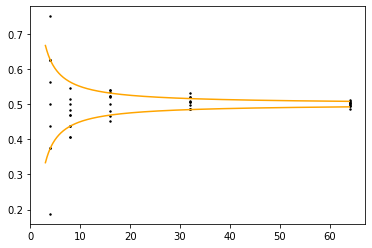

In [36]:
# Importáljuk a szükséges csomagokat
import matplotlib.pyplot as plt
from numpy import reciprocal, arange

# Az áramkörhöz tartozóan a '0' eredmény elméletből ismert értéke
p_ideal=0.5
q_ideal=1-p_ideal

# Állítsuk be az x-tengelyen milyen beosztással és milyen tartományban szeretnénk ábrázolni
# Az x értékek a mérés-számoknak felelnek meg (amelyekből már négyzetgyököt vontunk)
# A sqrt(N)-ek 2^2-tól 2^6-ig mennek, azaz 4-től 64-ig
x = arange(3, 64, 0.1)
# Számítsuk ki hozzá a két görbét (mivel a mérés-számokból már gyököt vontunk, ezért itt már 
# csak azok reciprokát kell vennünk, majd megszoroznunk sqrt(p*(1-p))-vel)
# a szórást a p_ideal-hoz képest pozitív és negatív irányban is értelmezzük, 
# ezért két görbét rajzolunk
y1 = p_ideal+sqrt(p_ideal*q_ideal)*reciprocal(x)
y2 = p_ideal-sqrt(p_ideal*q_ideal)*reciprocal(x)
    
# plot-oljuk az így kapott pontokat
plt.plot(x, y1, color="orange")
plt.plot(x, y2, color="orange") 
plt.scatter(N_list, p_i_list, s=2, color="black")
plt.show()

#### Látható, hogy minél több mérést végzünk, annál jobban lecsökken a statisztikai hiba.
#### A valódi kvantumszámítógépeken sok különböző hiba felléphet, ezek gyakran a mérések számának növelésével sem küszöbölhetők ki.